# 第２章　彗星の尾の形態

## 彗星の形状
![彗星](./pic/comet.jpg)
![彗星2](./pic/comet.png)
- 彗星の尾の形について考察
- 彗星は以下の3つで構成
  - 核
    - 2,3 ~ 200,300km程度
    - 太陽に接近するにつれて加熱され、コマに排出されていく
  - コマ
    - 球状の雲として観察される
    - 10,000-100,000km程度
    - 駒が生じるの太陽付近のみ
  - 尾
    - Type1
      - 水素、酸素窒素炭素のイオン
      - 尾は直線上で細かい構造を持つ。太陽とは反対側を向く
    - Type2
      - 細かい構造はない。
      - ダストを含む
      - type1より曲がっている。
      - type3があることもあるが、type2に包括される

## 彗星の方程式

![note_運動方程式](./pic/note1.jpg)
![note_彗星軌道](./pic/note2.jpg)
![note_彗星座標系](./pic/note3.jpg)
![note_ダストについて](./pic/note4.jpg)

## パラメータの値

- 離心率e
  - $\le 0.1$: 惑星(彗星、冥王星以外)



In [ ]:
from dataclasses import dataclass

import matplotlib.pyplot as plt
import numpy as np
from enum import Enum

class Comet:
    mu: float # 力の比 mu = F_{rad} / F_{grav}
    eccentricity: float # 離心率 e
    distance_of_perihelion: float # 近日点距離 a_p
    escape_velocity: float = 0.03 # 脱出速度 v_{esc} [AU/58.132day]

    @property
    def half_latus_rectum(self):
        """半直弦 p"""
        return self.distance_of_perihelion * (1 + self.eccentricity)
    
    @property
    def semi_major_axis(self):
        """長半径 a"""
        return self.distance_of_perihelion / (1 - self.eccentricity)

    def radius_of_orbit(self, nu: float|np.ndarray) -> float|np.ndarray:
        """軌道半径 r"""
        return self.half_latus_rectum / (1  +  self.eccentricity * np.cos(nu))
    
    def x(self, nu: float|np.ndarray) -> float|np.ndarray:
        """軌道のx座標"""
        return self.radius_of_orbit(nu) * np.cos(nu)
    
    def y(self, nu: float|np.ndarray) -> float|np.ndarray:
        """軌道のy座標"""
        return self.radius_of_orbit(nu) * np.sin(nu)
    
    def _a1(self, nu: float | np.ndarray) -> float | np.ndarray:
        """シンダイン曲線の係数A1"""
        return (np.sqrt(2) * self.radius_of_orbit(nu)) / np.sqrt(1 - self.mu)
    
    def _a2(self, nu: float | np.ndarray) -> float | np.ndarray:
        """シンダイン曲線の係数A2"""
        return (4. * self.eccentricity * self.radius_of_orbit(nu) * np.sin(nu)) / (3 * (1 - self.mu) * np.sqrt(self.half_latus_rectum))
    
    def _a3(self, _nu: float | np.ndarray) -> float | np.ndarray:
        """シンダイン曲線の係数A3"""
        return (2 * np.sqrt(2 * self.half_latus_rectum)) / (3 * np.sqrt(1 - self.mu))
    
    def coord_xy_to_st(self, x: float|np.ndarray, y: float|np.ndarray) -> tuple[float|np.ndarray, float|np.ndarray]:
        """座標変換(x, y) -> (s, t)"""
        #TODO
        s = 0
        t = 0
        return s, t
    
    def coord_st_to_xy(self, s: float|np.ndarray, t: float) -> tuple[float, float]:
        """座標変換(s, t) -> (x, y)"""
        #TODO
        x = 0
        y = 0
        return x, y
    
    def calculate_syndyname(self, s: float|np.ndarray) -> float|np.ndarray:
        """シンダイン曲線の座標"""
        #TODO 

    def draw(self):
        # 軌道を描画
        self._draw_orbit()

        # 適当な位置の彗星を指定
        nu = np.random.uniform(0, 2 * np.pi)
        self._draw_comet(nu)
        self._draw_syndyname(nu)
        
        plt.show()
    
    def _draw_syndyname(self, nu: float):
        """シンダイン曲線を描画する"""
        escape_direction = np.linspace(-np.pi, np.pi, 5) # 太陽と脱出角度のなす角度G
        particle_coord_s = np.linspace(0.05, 0.5, 5) # 彗星座標系における粒子の座標s
        particle_coord_t = self.calculate_syndyname(escape_direction, particle_coord_s) # 彗星座標系における粒子の座標t

        particle_coord_x, particle_coord_y =self.coord_st_to_xy(particle_coord_s, particle_coord_t)[0] # 粒子のx座標

        plt.plot(particle_coord_x, particle_coord_y, 'o')
        plt.gca().set_aspect('equal', adjustable='box')

    def _draw_orbit(self):
        """軌道を描画する"""
        nu = np.linspace(0, 2*np.pi, 1000)
        # 太陽を描画
        plt.plot(0, 0, 'o', color='red')

        # 彗星の軌道を描画
        x = self.x(nu)
        y = self.y(nu)
        plt.plot(x, y)

        plt.xlim(-self.half_latus_rectum, self.half_latus_rectum)
        plt.ylim(-self.half_latus_rectum, self.half_latus_rectum)
        plt.gca().set_aspect('equal', adjustable='box')

    def _draw_comet(self, nu:float):
        """彗星を描画する"""
        plt.plot(self.x(nu), self.y(nu), 'o')


    

    


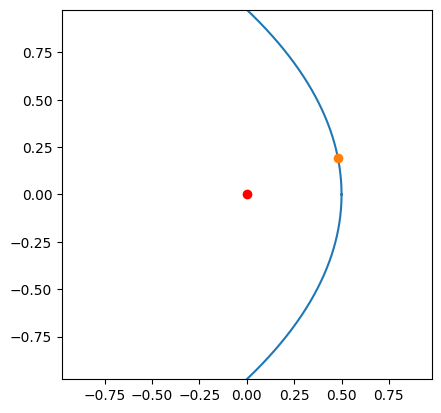

In [74]:
eccentricities = [0.95, 0.97] # 離心率 e
mus = [0., -17, ] # 輻射圧と重力の比 mu = F_{rad} / F_{grav}
ap = 0.50 # 近日点距離 A.U.
for ecc in eccentricities:
    for mu in mus:
        comet = Comet(mu=mu, eccentricity=ecc, distance_of_perihelion=ap)
        comet.draw_orbit()
        break
    break

In [67]:


print("Astrophysics with a PC: COMET TAILS")
print("------------------------------------")
print()
print("---- Minimal solution program ----")
print()

print("Input parameters and orbital elements : ")
print("Perihelium distance (A.U.) : ")
ap = float(input())
print("Eccentricity of the comet orbit: ")
ecc = float(input())
print("Parameter 1 - mu : ")
mu = float(input())
print("Outflow velocity : ")
g = float(input())

p = ap * (1 + ecc)

for i in range(-4, 4):
    # this for-cycle considers 9 positions of the comet int its orbit
    # next block computes position of the nuvleus and parameters A1, A2 and A3 and shows these results on screen
    nu = 0.5 * i
    r = p / (1 + ecc * cos(nu))
    x = r * cos(nu)
    y = r * sin(nu)

    a1 = sqrt(2 / mu) * r
    a2 = 4 * ecc * r * sin(nu) / 3 / mu / sqrt(p)
    a3 = sqrt(8 * p / mu) / 3 / r

    print(f"Position {i:02} : true anomaly = {nu:6.2f} r = {r:6.2f} x = {x:6.2f} y = {y:6.2f}")
    print(f"a1 = {a1:6.2f} a2 = {a2:6.2f} a3 = {a3:6.2f}")

    print(f"s\tt\tx\ty")

    for j in range(-1, 1):
        # this for-cycle considers 3 syndynames for each of the 9 positions
        gg = j * pi / 2
        ggdegree = j * 90

        print(f"Syndyname for G = {ggdegree:.0f}")

        for k in range(1, 9):
            # this for-cycle computes 9 points (s, t) and their (x', y') transformation
            s = 0.05 * k
            t = g * sin(gg) * (a1 * sqrt(s) - a2 * s) + a3 * s * sqrt(s)

            xx = (s * x + t * y + r * x) / r
            yy = (s * y - t * x + r * y) / r

            print(f"{s:6.2f}\t{t:6.2f}\t{xx:6.2f}\t{yy:6.2f}")

Astrophysics with a PC: COMET TAILS
------------------------------------

---- Minimal solution program ----

Input parameters and orbital elements : 
Perihelium distance (A.U.) : 


ValueError: could not convert string to float: ''